In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [22]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        './data',
        target_size=(80, 80),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'grayscale',
        shuffle = True,
        )
validation_generator = train_datagen.flow_from_directory(
        './data',
        target_size=(80, 80),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        color_mode = 'grayscale',
        shuffle= True)


Found 3028 images belonging to 5 classes.
Found 1295 images belonging to 5 classes.


In [23]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [24]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [25]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [26]:
train_generator[31][1].shape

(32, 5)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5,  activation='softmax'))

In [28]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [29]:
# %tensorflow_version 2.x
import tensorflow as tf

In [30]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch = 20,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=20)

Epoch 1/20
20/20 [==============================] - 5s 235ms/step - loss: 2.1720 - accuracy: 0.2588 - val_loss: 1.6083 - val_accuracy: 0.2440
Epoch 2/20
20/20 [==============================] - 4s 215ms/step - loss: 1.6100 - accuracy: 0.2086 - val_loss: 1.6074 - val_accuracy: 0.2440
Epoch 3/20
20/20 [==============================] - 4s 212ms/step - loss: 1.6065 - accuracy: 0.2678 - val_loss: 1.6064 - val_accuracy: 0.2440
Epoch 4/20
20/20 [==============================] - 4s 219ms/step - loss: 1.6064 - accuracy: 0.2282 - val_loss: 1.6055 - val_accuracy: 0.2440
Epoch 5/20
20/20 [==============================] - 5s 242ms/step - loss: 1.6134 - accuracy: 0.2740 - val_loss: 1.6047 - val_accuracy: 0.2432
Epoch 6/20
20/20 [==============================] - 4s 232ms/step - loss: 1.6034 - accuracy: 0.2492 - val_loss: 1.6043 - val_accuracy: 0.2432
Epoch 7/20
20/20 [==============================] - 5s 235ms/step - loss: 1.6026 - accuracy: 0.2585 - val_loss: 1.6037 - val_accuracy: 0.2432
Epoch 

In [31]:
model.evaluate(validation_generator)

130/130 [==============================] - 3s 25ms/step - loss: 1.6000 - accuracy: 0.2432


[1.6000107526779175, 0.2432432472705841]

In [32]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

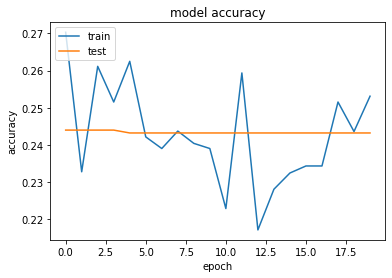

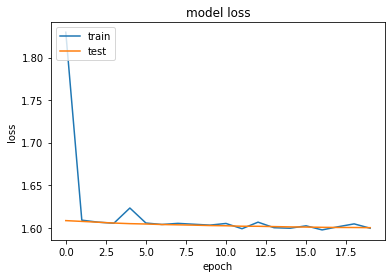

In [33]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [34]:
y_pred1 = model.predict(validation_generator)

In [35]:
y_pred1.shape

(1295, 5)

In [36]:
list1 = []
for i in range(0,len(validation_generator)):
    for j in range(0,val_batch):
        try:
              list1.append(validation_generator[i][1][j].tolist())
        except:
              break

In [37]:
np.argmax(y_pred1, axis=1)[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
np.argmax(list1[0:30],axis=1)

array([3, 3, 4, 0, 1, 2, 0, 3, 4, 2, 0, 1, 3, 0, 0, 4, 2, 2, 3, 1, 3, 1,
       0, 4, 2, 3, 2, 0, 1, 2], dtype=int64)

In [39]:
len(list1)

1295

In [40]:
plt.figure(figsize = (20,20))
for i in range(10):
    img = train_datagen[600*i][0]
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(train_datagen[600*i][1])
plt.show()

TypeError: 'ImageDataGenerator' object is not subscriptable

<Figure size 1440x1440 with 0 Axes>